In [1]:
# Partial Dependence Plots (PDP) show how each variable or predictor impacts our models decisions

# This is a visual way to understand our model and differences between variables on our predictor

# Similar to linear/logistic regression models, PDP plots can be interpreted by the coefficients in the models
# BUT, Partial Dependence Plots capture more complex patterns from our data
# Let's look at our data and set it up

In [25]:
# Import our Pandas
import pandas as pd

# Import our PDP plot and Imputer
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

# Import our dataset
df = pd.read_csv('./datasets/melb_data.csv')

# Function to Impute our data
def impute_data(dataset, use_columns):
    x_model = dataset[use_columns]
    y_model = dataset.Price
    my_imputer = Imputer()
    x_model_imputed = my_imputer.fit_transform(x_model)
    return x_model_imputed, y_model

In [26]:
# View df columns
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

(<Figure size 432x288 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x126d43710>])

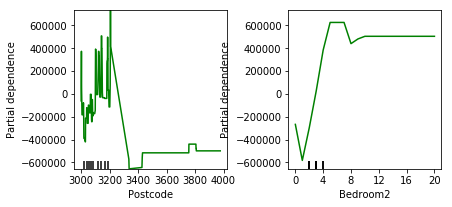

In [64]:
# Which Columns do you want to see impact prices?
use_columns = ['Postcode', 'Car', 'Bedroom2']

# Build out the model
x, y = impute_data(df, use_columns)

# Define the model
price_model = GradientBoostingRegressor()

# Fit the model
price_model.fit(x,y)

# Now let's plot it out!
price_plots = plot_partial_dependence(price_model, 
                                   features=[0,2], 
                                   X=x, 
                                   feature_names=use_columns, 
                                   grid_resolution=500)
price_plots

In [ ]:
# The plot on the left shows the cost per house via postalcode
# The plot on the right shows the cost per house via # of bedrooms

# PDPs can be extremely useful to communicate insights to non-tech folks